In [69]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

## Training data

In [70]:
df_2016 = pd.read_csv("../Daten/Penmanshiel_SCADA_2016/penmanshiel_turbine1.csv")
df_2017 = pd.read_csv("../Daten/Penmanshiel_SCADA_2017/penmanshiel_turbine1.csv")
df_2018 = pd.read_csv("../Daten/Penmanshiel_SCADA_2018/penmanshiel_turbine1.csv")
df_2019 = pd.read_csv("../Daten/Penmanshiel_SCADA_2019/penmanshiel_turbine1.csv")

In [71]:
dfs = [df_2016, df_2017, df_2018, df_2019]

# Die DataFrames vertikal zusammenfügen
df_combined = pd.concat(dfs, ignore_index=True)

In [72]:
cutoff_date = "2019-06-30 23:50:00"
df_train = df_combined[df_combined["Date and time"] <= cutoff_date]

In [73]:
df_train["Wind speed, Maximum (m/s)"]

0          0.000000
1          5.410000
2          4.780000
3          3.530000
4          3.690000
            ...    
161166    12.798350
161167    14.511500
161168    16.977051
161169    15.492051
161170    14.274351
Name: Wind speed, Maximum (m/s), Length: 161171, dtype: float64

In [74]:
df_train['Date and time'] = pd.to_datetime(df_train['Date and time'], format='mixed', dayfirst=True, errors='coerce')

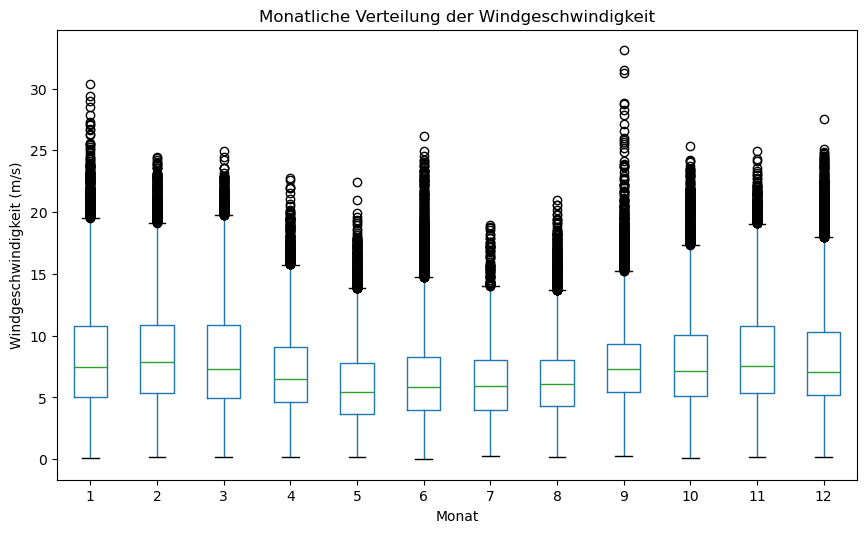

In [18]:
import matplotlib.pyplot as plt

# Extrahiere den Monat aus dem Datum
df_train['Month'] = df_train['Date and time'].dt.month

# Erstelle den Boxplot
df_train.boxplot(column='Wind speed (m/s)', by='Month', grid=False, showfliers=True, figsize=(10,6))

# Anpassung des Plots
plt.title("Monatliche Verteilung der Windgeschwindigkeit")
plt.suptitle("")  # Entfernt den übergeordneten Titel
plt.xlabel("Monat")
plt.ylabel("Windgeschwindigkeit (m/s)")
plt.xticks(rotation=0)  # Optionale Anpassung der x-Achsen-Beschriftung
plt.rcParams.update({'font.size': 14})
plt.show()

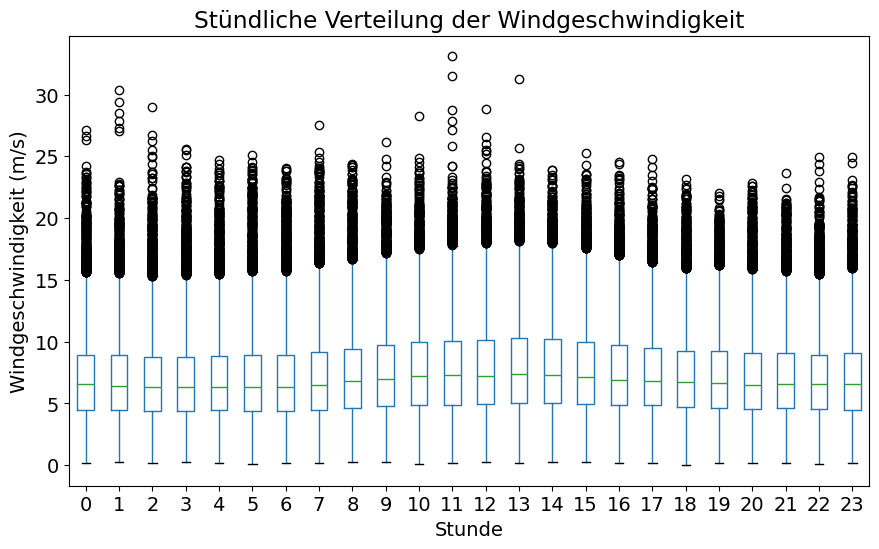

In [19]:
import matplotlib.pyplot as plt

# Extrahiere den Monat aus dem Datum
df_train['Hour'] = df_train['Date and time'].dt.hour

# Erstelle den Boxplot
df_train.boxplot(column='Wind speed (m/s)', by='Hour', grid=False, showfliers=True, figsize=(10,6))

# Anpassung des Plots
plt.title("Stündliche Verteilung der Windgeschwindigkeit")
plt.suptitle("")  # Entfernt den übergeordneten Titel
plt.xlabel("Stunde")
plt.ylabel("Windgeschwindigkeit (m/s)")
plt.xticks(rotation=0)  # Optionale Anpassung der x-Achsen-Beschriftung
plt.rcParams.update({'font.size': 14})
plt.show()

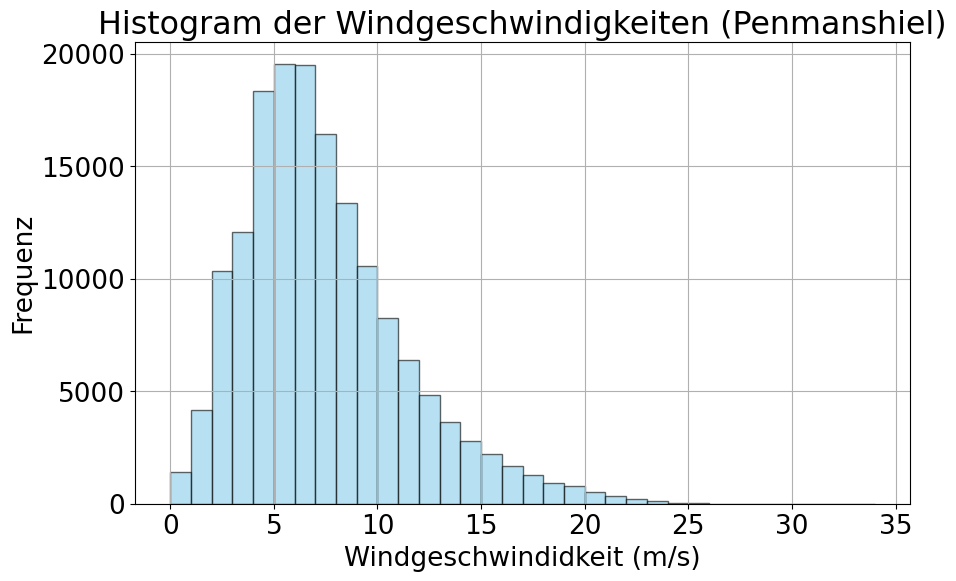

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Beispiel für die Datendaten (hier musst du "filtered_df" einsetzen)
filtered_df = df_train['Wind speed (m/s)']  # Deine Windgeschwindigkeitsdaten

# Manuelle Definition der Bin-Grenzen
bin_edges = np.arange(0, filtered_df.max() + 1, 1)  # Starte bei 0, Schrittweite 1

# Histogramm mit manuell definierten Bin-Grenzen
plt.figure(figsize=(10, 6))
plt.hist(filtered_df, bins=bin_edges, density=False, alpha=0.6, color='skyblue', edgecolor='black')
plt.title("Histogram der Windgeschwindigkeiten (Penmanshiel)")
plt.xlabel("Windgeschwindidkeit (m/s)")
plt.ylabel("Frequenz")
plt.grid(True)

plt.rcParams.update({'font.size': 19})
plt.show()

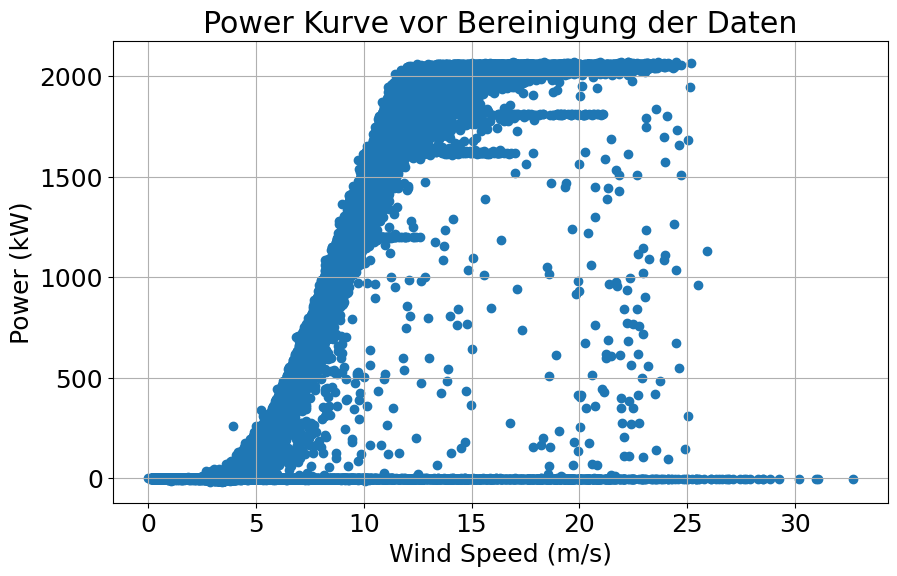

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df_train["Density adjusted wind speed (m/s)"], df_train['Power (kW)'])
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
plt.title('Power Kurve vor Bereinigung der Daten')
plt.grid(True)

plt.rcParams.update({'font.size': 18})
plt.show()

In [22]:
# Nur numerische Spalten auswählen
numerische_spalten = df_train.select_dtypes(include=['float64', 'int64'])

# Berechnung der Korrelationen mit 'Power (kW)'
korrelationen = numerische_spalten.corr()['Power (kW)']
korrelationen = korrelationen.dropna()
# Ausgabe der Korrelationen


In [23]:
korrelationen = korrelationen.sort_values()
print(korrelationen)

Power factor (cosphi), Max   -0.569141
Power factor (cosphi), Min   -0.533294
Reactive power (kvar)        -0.526663
Reactive power, Max (kvar)   -0.513637
Reactive power, Min (kvar)   -0.469099
                                ...   
Apparent power (kVA)          0.997897
Current L1 / U (A)            0.999086
Current L3 / W (A)            0.999120
Current L2 / V (A)            0.999151
Power (kW)                    1.000000
Name: Power (kW), Length: 228, dtype: float64


In [24]:
# Definiere den Schwellenwert für "Lost Production Total (kWh)"
threshold = 0  # Beispielwert, anpassen je nach Bedarf

# Bedingungen für die zu entfernenden Zeilen
condition = (df_train["Lost Production Total (kWh)"] > threshold)


# Entferne die Zeilen, die die Bedingungen erfüllen
df_train = df_train[~condition]

# Zeige das Ergebnis
print(df_train)

             Date and time  Wind speed (m/s)  \
2      2016-06-06 18:30:00          3.000000   
3      2016-06-06 18:40:00          2.550000   
12     2016-06-06 20:10:00          3.350000   
23     2016-06-06 22:00:00          2.900000   
24     2016-06-06 22:10:00          2.400000   
...                    ...               ...   
161150 2019-06-30 20:30:00          7.512485   
161153 2019-06-30 21:00:00          8.442350   
161157 2019-06-30 21:40:00         11.042360   
161161 2019-06-30 22:20:00         11.019425   
161162 2019-06-30 22:30:00         10.990925   

        Wind speed, Standard deviation (m/s)  Wind speed, Minimum (m/s)  \
2                                   0.540000                    1.42000   
3                                   0.430000                    1.11000   
12                                  0.300000                    2.29000   
23                                  0.280000                    2.19000   
24                                  0.130000    

In [25]:
# Definiere den Schwellenwert für "Lost Production Total (kWh)"
threshold = 0  # Beispielwert, anpassen je nach Bedarf

# Bedingungen für die zu entfernenden Zeilen
condition = ((df_train["Lost Production Total (kWh)"] >= threshold) | (df_train["Lost Production Total (kWh)"] <= -20)) & (df_train["Wind speed (m/s)"] >= 2.5)


# Entferne die Zeilen, die die Bedingungen erfüllen
df_train = df_train[~condition]

# Zeige das Ergebnis

In [26]:

condition = (df_train["Yaw bearing angle (°)"] != df_train["Wind direction (°)"]) & (df_train["Wind speed (m/s)"] > 13) & (df_train["Power (kW)"] < 1800)
cond = df_train[condition]
print(cond[["Power (kW)", "Wind speed (m/s)"]])

df_train = df_train[~condition]

        Power (kW)  Wind speed (m/s)
22589  1743.260010             13.65
22590  1736.109985             13.45
22591  1739.699951             14.00
22592  1693.479980             15.20
22762  1632.479980             14.05
22769  1615.810059             15.31
22770  1627.300049             14.21
22772  1629.260010             13.99
22788  1619.709961             15.36
22799  1624.310059             14.22
23232  1629.550049             14.69
23233  1676.750000             15.21
23396  1620.089966             14.48
23397  1625.630005             14.83
23402  1714.170044             14.02
23440  1642.400024             14.01
23441  1626.819946             14.95
23442  1638.209961             14.05
23443  1630.250000             15.17
23446  1620.099976             15.42
23453  1730.890015             14.08
23455  1678.890015             14.67
23459  1669.099976             14.23
23461  1702.709961             13.96
23462  1660.920044             14.44
23463  1702.709961             13.62
2

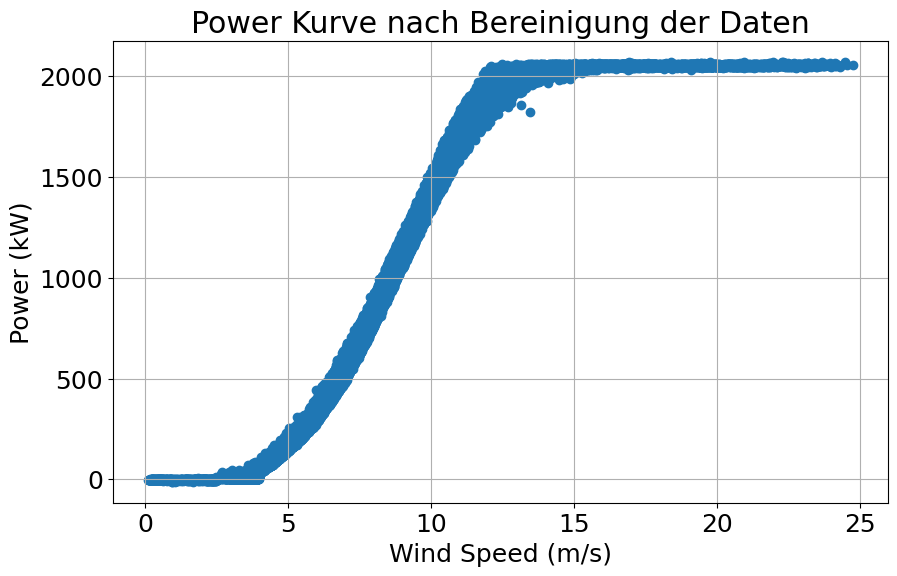

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(df_train["Density adjusted wind speed (m/s)"], df_train['Power (kW)'])
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
plt.title('Power Kurve nach Bereinigung der Daten')
plt.grid(True)

plt.rcParams.update({'font.size': 18})
plt.show()

In [28]:
relevant_columns = [
    "Date and time",
    "Density adjusted wind speed (m/s)", "Wind direction (°)", "Nacelle position (°)",
    "Power (kW)", "Wind speed (m/s)"
]
df_train = df_train[relevant_columns]

In [29]:
df_train.describe()

,Date and time,Density adjusted wind speed (m/s),Wind direction (°),Nacelle position (°),Power (kW),Wind speed (m/s)
count,77191,70264.000000,77030.000000,77030.000000,77030.000000,77030.000000
mean,2018-01-03 07:27:22.683732480,7.081773,203.259993,202.309124,676.317302,7.080850
min,2016-06-06 22:10:00,0.109508,0.010000,0.000000,-11.690000,0.110000
25%,2017-04-11 00:55:00,4.370167,154.073826,151.932495,84.878054,4.350000
50%,2017-12-31 20:20:00,6.490825,208.369995,207.220001,423.880005,6.490000
75%,2018-09-25 19:55:00,9.003182,264.629768,264.290009,1130.242493,9.039508
max,2019-06-30 22:30:00,24.724788,359.998016,359.996338,2071.204346,24.792538
std,NaN,3.933324,83.671999,84.315202,686.583144,3.940119


In [30]:
df_train["Power (kW)"][df_train["Power (kW)"] < 0] = 0

In [31]:
df_train.describe()

,Date and time,Density adjusted wind speed (m/s),Wind direction (°),Nacelle position (°),Power (kW),Wind speed (m/s)
count,77191,70264.000000,77030.000000,77030.000000,77030.000000,77030.000000
mean,2018-01-03 07:27:22.683732480,7.081773,203.259993,202.309124,676.536865,7.080850
min,2016-06-06 22:10:00,0.109508,0.010000,0.000000,0.000000,0.110000
25%,2017-04-11 00:55:00,4.370167,154.073826,151.932495,84.878054,4.350000
50%,2017-12-31 20:20:00,6.490825,208.369995,207.220001,423.880005,6.490000
75%,2018-09-25 19:55:00,9.003182,264.629768,264.290009,1130.242493,9.039508
max,2019-06-30 22:30:00,24.724788,359.998016,359.996338,2071.204346,24.792538
std,NaN,3.933324,83.671999,84.315202,686.366456,3.940119


In [32]:
df_train.isna().sum()

Date and time                           0
Density adjusted wind speed (m/s)    6927
Wind direction (°)                    161
Nacelle position (°)                  161
Power (kW)                            161
Wind speed (m/s)                      161
dtype: int64

In [33]:
df_numeric = df_train.select_dtypes(include=["float64", "int64"])
df_train[df_numeric.columns] = df_numeric.interpolate().fillna(method="bfill").fillna(method="ffill")

In [34]:
df_train.isna().sum()

Date and time                        0
Density adjusted wind speed (m/s)    0
Wind direction (°)                   0
Nacelle position (°)                 0
Power (kW)                           0
Wind speed (m/s)                     0
dtype: int64

In [35]:
output_file = "../Daten/train_data_penman.csv"
df_train.to_csv(output_file, index=False)

print(f"Gefilterte Daten wurden als '{output_file}' gespeichert.")

Gefilterte Daten wurden als '../Daten/train_data_penman.csv' gespeichert.


In [36]:
COLUMNS = [
    "Density adjusted wind speed (m/s)", "Wind direction (°)", "Nacelle position (°)",
    "Power (kW)", "Wind speed (m/s)"
]

## Validation data

In [37]:
df_2020 = pd.read_csv("../Daten/Penmanshiel_SCADA_2020/penmanshiel_turbine1.csv")

In [38]:
dfs = [df_2019, df_2020]

# Die DataFrames vertikal zusammenfügen
df_combined_val = pd.concat(dfs, ignore_index=True)

In [39]:
relevant_columns = [
    "Date and time",
    "Density adjusted wind speed (m/s)", "Wind direction (°)", "Nacelle position (°)",
    "Power (kW)", "Wind speed (m/s)"
]
df_combined_val = df_combined_val[relevant_columns]

In [40]:
cutoff_date = "2020-06-30 23:50:00"
start_date = "2019-07-01 00:00:00"
df_val = df_combined_val[df_combined_val["Date and time"] >= start_date]

df_val = df_val[df_val["Date and time"] <= cutoff_date]

In [41]:
df_val.last

<bound method NDFrame.last of              Date and time  Density adjusted wind speed (m/s)  \
26064  2019-07-01 00:00:00                          11.021804   
26065  2019-07-01 00:10:00                           9.137446   
26066  2019-07-01 00:20:00                          10.512351   
26067  2019-07-01 00:30:00                          13.575320   
26068  2019-07-01 00:40:00                          11.463451   
...                    ...                                ...   
78763  2020-06-30 23:10:00                           1.478405   
78764  2020-06-30 23:20:00                           1.457151   
78765  2020-06-30 23:30:00                           1.445447   
78766  2020-06-30 23:40:00                           1.589516   
78767  2020-06-30 23:50:00                           1.430923   

       Wind direction (°)  Nacelle position (°)   Power (kW)  Wind speed (m/s)  
26064          242.237865            239.047760  1550.212778         11.112017  
26065          234.896420  

In [42]:
df_val["Power (kW)"][df_val["Power (kW)"] < 0] = 0

In [43]:
df_numeric = df_val.select_dtypes(include=["float64", "int64"])
df_val[df_numeric.columns] = df_numeric.interpolate().fillna(method="bfill").fillna(method="ffill")

In [44]:
output_file = "../Daten/validation_data_penman.csv"
df_val.to_csv(output_file, index=False)

print(f"Gefilterte Daten wurden als '{output_file}' gespeichert.")

Gefilterte Daten wurden als '../Daten/validation_data_penman.csv' gespeichert.


## Test data

In [58]:
df_2021 = pd.read_csv("../Daten/penmanshield_scada_2021/penmanshield_turbine1.csv")

In [59]:
dfs = [df_2020, df_2021]

# Die DataFrames vertikal zusammenfügen
df_combined_test = pd.concat(dfs, ignore_index=True)

In [50]:
plt.figure(figsize=(14, 6))
plt.scatter(df_combined_test['Date and time'].iloc[:10000], df_combined_test["Lost Production Total (kWh)"].iloc[:10000])
plt.xlabel('Date')
plt.ylabel('Lost Production (kWh)')
plt.title('Production Loss')
plt.grid(True)
plt.show()

KeyboardInterrupt: 

In [60]:
relevant_columns = [
    "Date and time",
    "Density adjusted wind speed (m/s)", "Wind direction (°)", "Nacelle position (°)",
    "Power (kW)", "Wind speed (m/s)"
]
df_combined_val = df_combined_val[relevant_columns]

In [61]:
start_date = "2020-07-01 00:00:00"
df_test = df_combined_val[df_combined_val["Date and time"] >= start_date]

In [62]:
df_test.last

<bound method NDFrame.last of               Date and time  Density adjusted wind speed (m/s)  \
78768   2020-07-01 00:00:00                           1.560913   
78769   2020-07-01 00:10:00                           1.755164   
78770   2020-07-01 00:20:00                           2.510014   
78771   2020-07-01 00:30:00                           2.972598   
78772   2020-07-01 00:40:00                           3.232365   
...                     ...                                ...   
105259  2020-12-31 23:10:00                          13.522677   
105260  2020-12-31 23:20:00                          12.595046   
105261  2020-12-31 23:30:00                          11.481846   
105262  2020-12-31 23:40:00                          12.929970   
105263  2020-12-31 23:50:00                          13.342074   

        Wind direction (°)  Nacelle position (°)   Power (kW)  \
78768           220.722664            218.194580    -1.326281   
78769           252.006337            218.19458

In [63]:
df_test["Power (kW)"][df_test["Power (kW)"] < 0] = 0

In [64]:
df_test = df_test.loc[:, ~df_test.columns.duplicated()]

In [65]:
df_numeric = df_test.select_dtypes(include=["float64", "int64"])
df_test[df_numeric.columns] = df_numeric.interpolate().fillna(method="bfill").fillna(method="ffill")

In [66]:
output_file = "../Daten/test_data_penman.csv"
df_test.to_csv(output_file, index=False)

print(f"Gefilterte Daten wurden als '{output_file}' gespeichert.")

Gefilterte Daten wurden als '../Daten/test_data_penman.csv' gespeichert.


# Windspeed data

In [3]:
import pandas as pd

# Datei laden (ersetzen Sie 'daten.csv' durch den tatsächlichen Dateinamen)
datei = '../Daten/winddata_eu/winddata_eu_100m.csv'
df = pd.read_csv(datei)

# Konvertieren Sie das Datum in ein Datetime-Format
df['Date'] = pd.to_datetime(df['Date'])

# Filtern Sie die Daten nach dem gewünschten Zeitraum
start_date = '2016-01-01'
end_date = '2024-12-31'
df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Extrahieren Sie nur die Spalten 'Date' und 'UKF3'
df_result = df_filtered[['Date', 'UKF3']]

# Ergebnisse anzeigen
print(df_result)

# Optional: Ergebnisse in eine neue CSV-Datei speichern
output_file = '../Daten/wind_speed_ukf3_2016_2024.csv'
df_result.to_csv(output_file, index=False)
print(f"Die gefilterten Daten wurden in '{output_file}' gespeichert.")

                      Date      UKF3
324336 2016-01-01 00:00:00  8.619554
324337 2016-01-01 01:00:00  7.641271
324338 2016-01-01 02:00:00  6.789032
324339 2016-01-01 03:00:00  5.275001
324340 2016-01-01 04:00:00  4.212524
...                    ...       ...
401777 2024-10-31 19:00:00  5.714038
401778 2024-10-31 20:00:00  5.670762
401779 2024-10-31 21:00:00  5.881939
401780 2024-10-31 22:00:00  6.324793
401781 2024-10-31 23:00:00  6.319351

[77446 rows x 2 columns]
Die gefilterten Daten wurden in '../Daten/wind_speed_ukf3_2016_2024.csv' gespeichert.
